In [1]:
import pandas as pd
import numpy as np 
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn import preprocessing

#Random forest

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import confusion_matrix
import keras

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns',None)


df = pd.read_csv('Airlines.csv')
df.head()

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,1,CO,269,SFO,IAH,3,15,205,1
1,2,US,1558,PHX,CLT,3,15,222,1
2,3,AA,2400,LAX,DFW,3,20,165,1
3,4,AA,2466,SFO,DFW,3,20,195,1
4,5,AS,108,ANC,SEA,3,30,202,0


In [2]:
df.describe()

,id,Flight,DayOfWeek,Time,Length,Delay
count,539383.00000,539383.000000,539383.000000,539383.000000,539383.000000,539383.000000
mean,269692.00000,2427.928630,3.929668,802.728963,132.202007,0.445442
std,155706.60446,2067.429837,1.914664,278.045911,70.117016,0.497015
min,1.00000,1.000000,1.000000,10.000000,0.000000,0.000000
25%,134846.50000,712.000000,2.000000,565.000000,81.000000,0.000000
50%,269692.00000,1809.000000,4.000000,795.000000,115.000000,0.000000
75%,404537.50000,3745.000000,5.000000,1035.000000,162.000000,1.000000
max,539383.00000,7814.000000,7.000000,1439.000000,655.000000,1.000000


In [3]:
df.dtypes

id              int64
Airline        object
Flight          int64
AirportFrom    object
AirportTo      object
DayOfWeek       int64
Time            int64
Length          int64
Delay           int64
dtype: object

In [4]:
df.shape

(539383, 9)

In [5]:
df.isnull().values.any()

False

In [6]:
df.isnull().sum()

id             0
Airline        0
Flight         0
AirportFrom    0
AirportTo      0
DayOfWeek      0
Time           0
Length         0
Delay          0
dtype: int64

In [7]:
df_delay = round((df["Delay"] == 1) .mean(), 4)
df_delay

0.4454

In [8]:
df.head()

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,1,CO,269,SFO,IAH,3,15,205,1
1,2,US,1558,PHX,CLT,3,15,222,1
2,3,AA,2400,LAX,DFW,3,20,165,1
3,4,AA,2466,SFO,DFW,3,20,195,1
4,5,AS,108,ANC,SEA,3,30,202,0


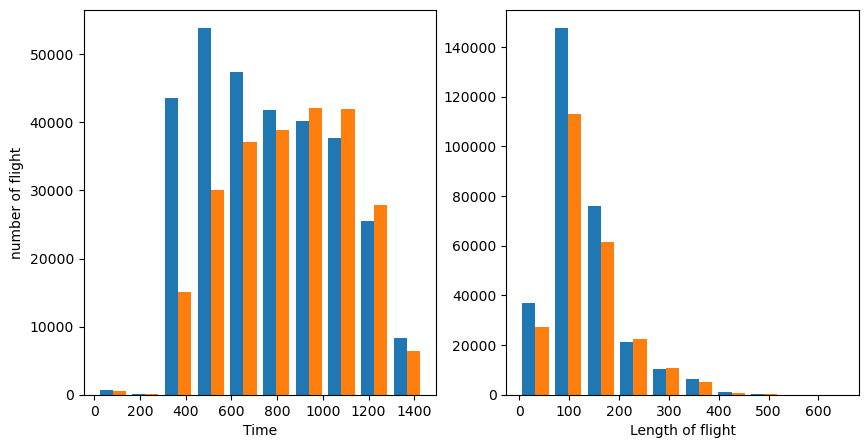

In [9]:
fig, (x1,x2) = plt.subplots(1, 2)
x1.hist([df["Time"][df["Delay"] == 0], df["Time"][df["Delay"] == 1]], 10, alpha = 1, histtype='bar', label=["No delay", "delay"])
x1.set(xlabel="Time", ylabel="number of flight")



x2.hist([df["Length"][df["Delay"] == 0], df["Length"][df["Delay"] == 1]], 10, alpha = 1, histtype='bar', label=["No delay", "delay"])
x2.set(xlabel="Length of flight")


fig.set_size_inches(10,5)

<AxesSubplot:xlabel='Airline', ylabel='count'>

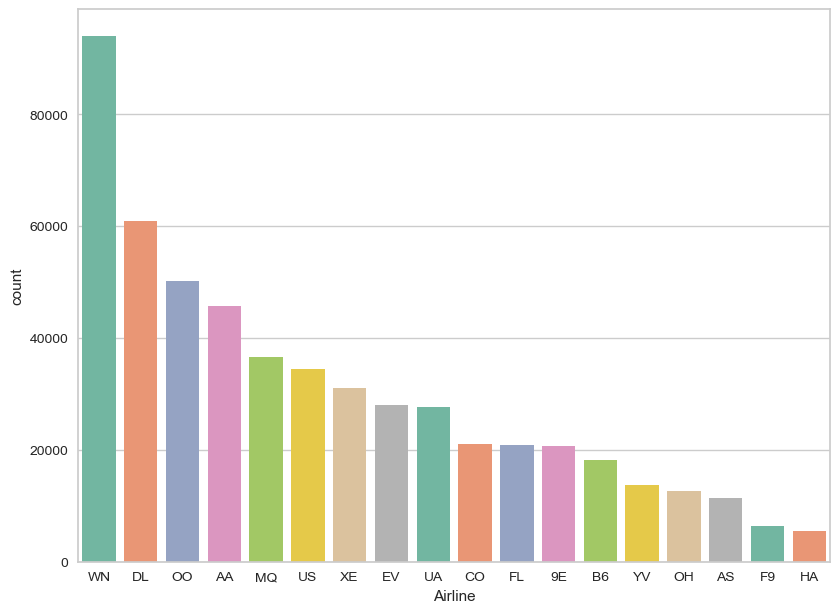

In [63]:
plt.figure(figsize=(33,33))
plt.subplot(4,3,1)
sns.countplot(x = 'Airline', palette='Set2', data = df, order = df['Airline'].value_counts().index)



<AxesSubplot:xlabel='DayOfWeek', ylabel='count'>

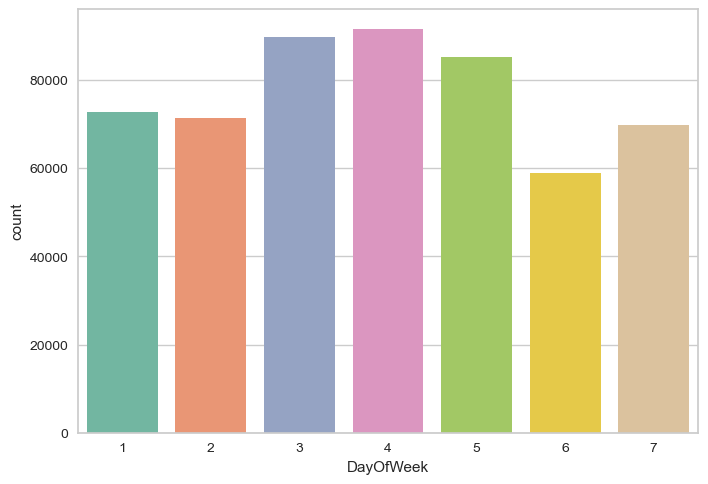

In [66]:
plt.subplot()
sns.countplot(x = 'DayOfWeek', palette='Set2', data = df)


<AxesSubplot:xlabel='Delay', ylabel='count'>

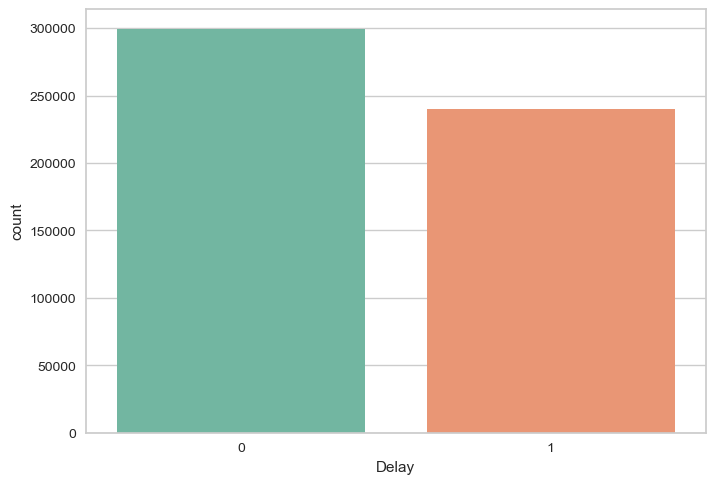

In [67]:

plt.subplot()
sns.countplot(x = 'Delay', palette='Set2', data = df)


<AxesSubplot:>

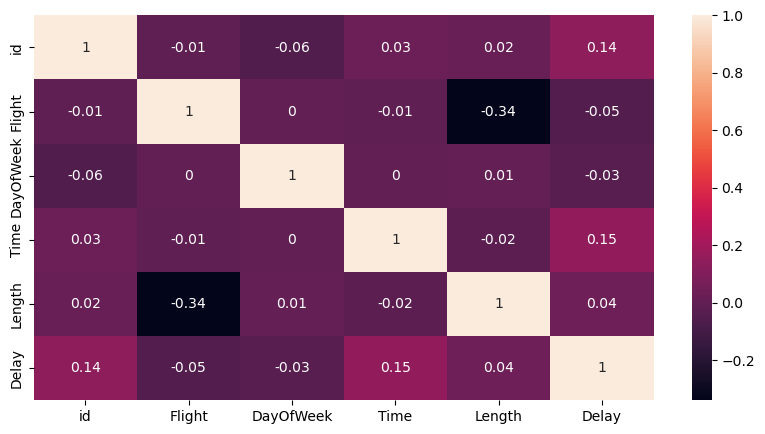

In [11]:
corr=df.corr().round(2)
plt.figure(figsize=(10,5))
sns.heatmap(corr,annot=True)

In [14]:
df.value_counts()

id      Airline  Flight  AirportFrom  AirportTo  DayOfWeek  Time  Length  Delay
1       CO       269     SFO          IAH        3          15    205     1        1
359600  9E       3789    IAH          MEM        2          980   107     0        1
359598  OO       6423    EUG          PDX        2          979   37      0        1
359597  OH       6391    RDU          JFK        2          979   116     0        1
359596  DL       2189    PHL          DTW        2          979   121     0        1
                                                                                  ..
179791  YV       2845    PHX          YUM        6          670   59      0        1
179790  YV       2730    PHX          LGB        6          670   85      0        1
179789  YV       1053    OGG          LIH        6          670   45      0        1
179788  XE       3069    HRL          IAH        6          670   67      0        1
539383  US       1442    LAX          PHL        5          1439  301 

In [15]:
df['Airline'].value_counts()

WN    94097
DL    60940
OO    50254
AA    45656
MQ    36605
US    34500
XE    31126
EV    27983
UA    27619
CO    21118
FL    20827
9E    20686
B6    18112
YV    13725
OH    12630
AS    11471
F9     6456
HA     5578
Name: Airline, dtype: int64

Model Building

In [16]:
df = df.drop('id', 1)

In [17]:
df

,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,CO,269,SFO,IAH,3,15,205,1
1,US,1558,PHX,CLT,3,15,222,1
2,AA,2400,LAX,DFW,3,20,165,1
3,AA,2466,SFO,DFW,3,20,195,1
4,AS,108,ANC,SEA,3,30,202,0
...,...,...,...,...,...,...,...,...
539378,CO,178,OGG,SNA,5,1439,326,0
539379,FL,398,SEA,ATL,5,1439,305,0
539380,FL,609,SFO,MKE,5,1439,255,0
539381,UA,78,HNL,SFO,5,1439,313,1


In [ ]:
x=df.iloc[:,0:6].values #taken first to last column
y=df.iloc[:,7].values #have taken only 7th column

In [19]:
x

array([['CO', 269, 'SFO', ..., 3, 15, 205],
       ['US', 1558, 'PHX', ..., 3, 15, 222],
       ['AA', 2400, 'LAX', ..., 3, 20, 165],
       ...,
       ['FL', 609, 'SFO', ..., 5, 1439, 255],
       ['UA', 78, 'HNL', ..., 5, 1439, 313],
       ['US', 1442, 'LAX', ..., 5, 1439, 301]], dtype=object)

In [20]:
y

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [21]:
from sklearn.preprocessing import LabelEncoder
label_encoder_airline = LabelEncoder()
label_encoder_airportfrom = LabelEncoder()
label_encoder_airportto = LabelEncoder()
x[:,0] = label_encoder_airline.fit_transform(x[:,0])
x[:,2] = label_encoder_airportfrom.fit_transform(x[:,2])
x[:,3] = label_encoder_airportto.fit_transform(x[:,3])


In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_standard = scaler.fit_transform(x)
x_standard[0]

array([-1.00530759, -1.04425823,  1.37168161, -0.11522128, -0.48555175,
       -2.83309217,  1.03823673])

In [23]:
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler().fit(x)

In [24]:
norm

MinMaxScaler()

In [25]:
x_normalization = norm.transform(x)
x_normalization

array([[0.23529412, 0.0343018 , 0.86643836, ..., 0.33333333, 0.00349895,
        0.3129771 ],
       [0.82352941, 0.19928325, 0.74315068, ..., 0.33333333, 0.00349895,
        0.3389313 ],
       [0.05882353, 0.30705235, 0.52739726, ..., 0.33333333, 0.0069979 ,
        0.2519084 ],
       ...,
       [0.47058824, 0.07781902, 0.86643836, ..., 0.66666667, 1.        ,
        0.38931298],
       [0.76470588, 0.00985537, 0.43835616, ..., 0.66666667, 1.        ,
        0.4778626 ],
       [0.82352941, 0.1844362 , 0.52739726, ..., 0.66666667, 1.        ,
        0.45954198]])

In [26]:

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_normalization, y, test_size=0.3, random_state=0)

# Create a Random Forest classifier object
#rfc = RandomForestClassifier(n_estimators=100, random_state=42)


In [27]:
x_test.shape

(161815, 7)

In [28]:
y_test.shape

(161815,)

In [29]:
#Building Decision Tree Model
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, random_state = 0)
clf

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [30]:

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)
clf

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [31]:

#Predict the response for test dataset
y_pred = clf.predict(x_test)

y_pred

array([1, 0, 1, ..., 1, 0, 0], dtype=int64)

In [32]:

# Model Accuracy, how often is the classifier correct?
print("Accuracy_d:",metrics.accuracy_score(y_test, y_pred))

Accuracy_d: 0.6255229737663381


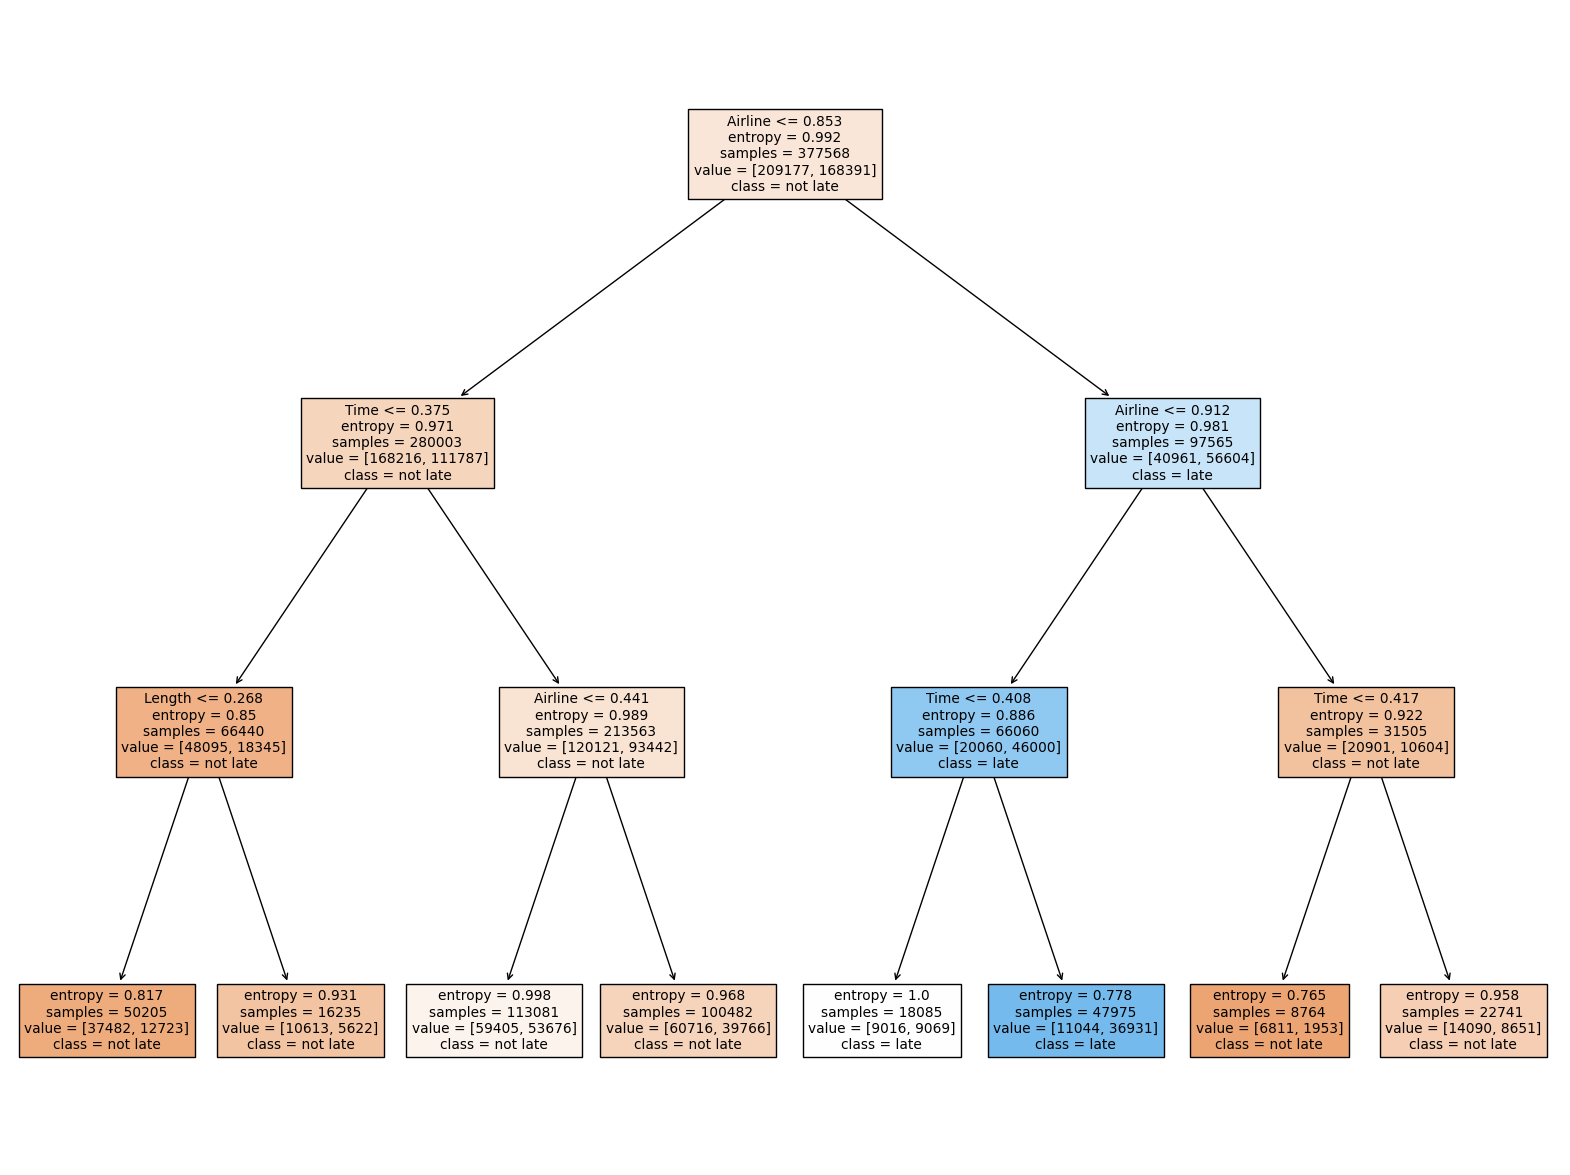

In [33]:
from sklearn import tree
fig = plt.figure(figsize=(20,15))
tree.plot_tree(clf, feature_names = df.columns[:-1], class_names=['not late', 'late'], filled=True);

In [34]:
#pip install yellowbrick

In [35]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from yellowbrick.classifier import ConfusionMatrix


0.6255229737663381

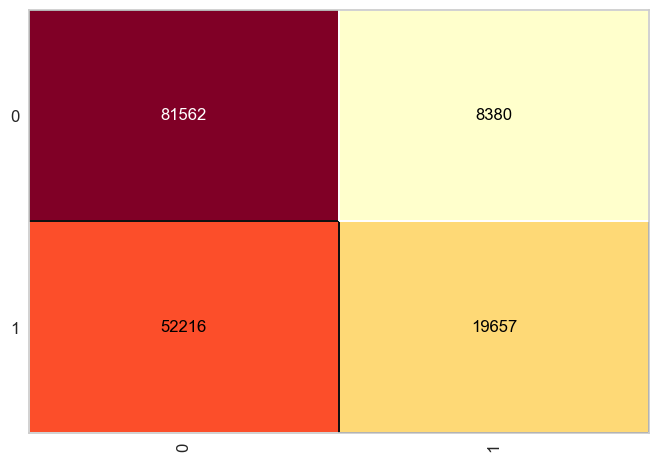

In [36]:
cm = ConfusionMatrix(clf)
cm.fit(x_train, y_train)
cm.score(x_test, y_test)

In [37]:
classification_clf = (classification_report(y_test, y_pred))

print(classification_clf)

              precision    recall  f1-score   support

           0       0.61      0.91      0.73     89942
           1       0.70      0.27      0.39     71873

    accuracy                           0.63    161815
   macro avg       0.66      0.59      0.56    161815
weighted avg       0.65      0.63      0.58    161815



In [38]:
columns = df.iloc[:, 0:7].columns
feature = pd.Series(clf.feature_importances_, index = columns).sort_values(ascending = False)
feature

Airline        0.664998
Time           0.319672
Length         0.015330
Flight         0.000000
AirportFrom    0.000000
AirportTo      0.000000
DayOfWeek      0.000000
dtype: float64

In [39]:
clf_1 = DecisionTreeClassifier(max_depth = 3, random_state = 0)
clf_1 = clf_1.fit(x_train,y_train)
DecisionTreeClassifier(max_depth = 3, random_state = 0)
pred_1 = clf_1.predict(x_test)

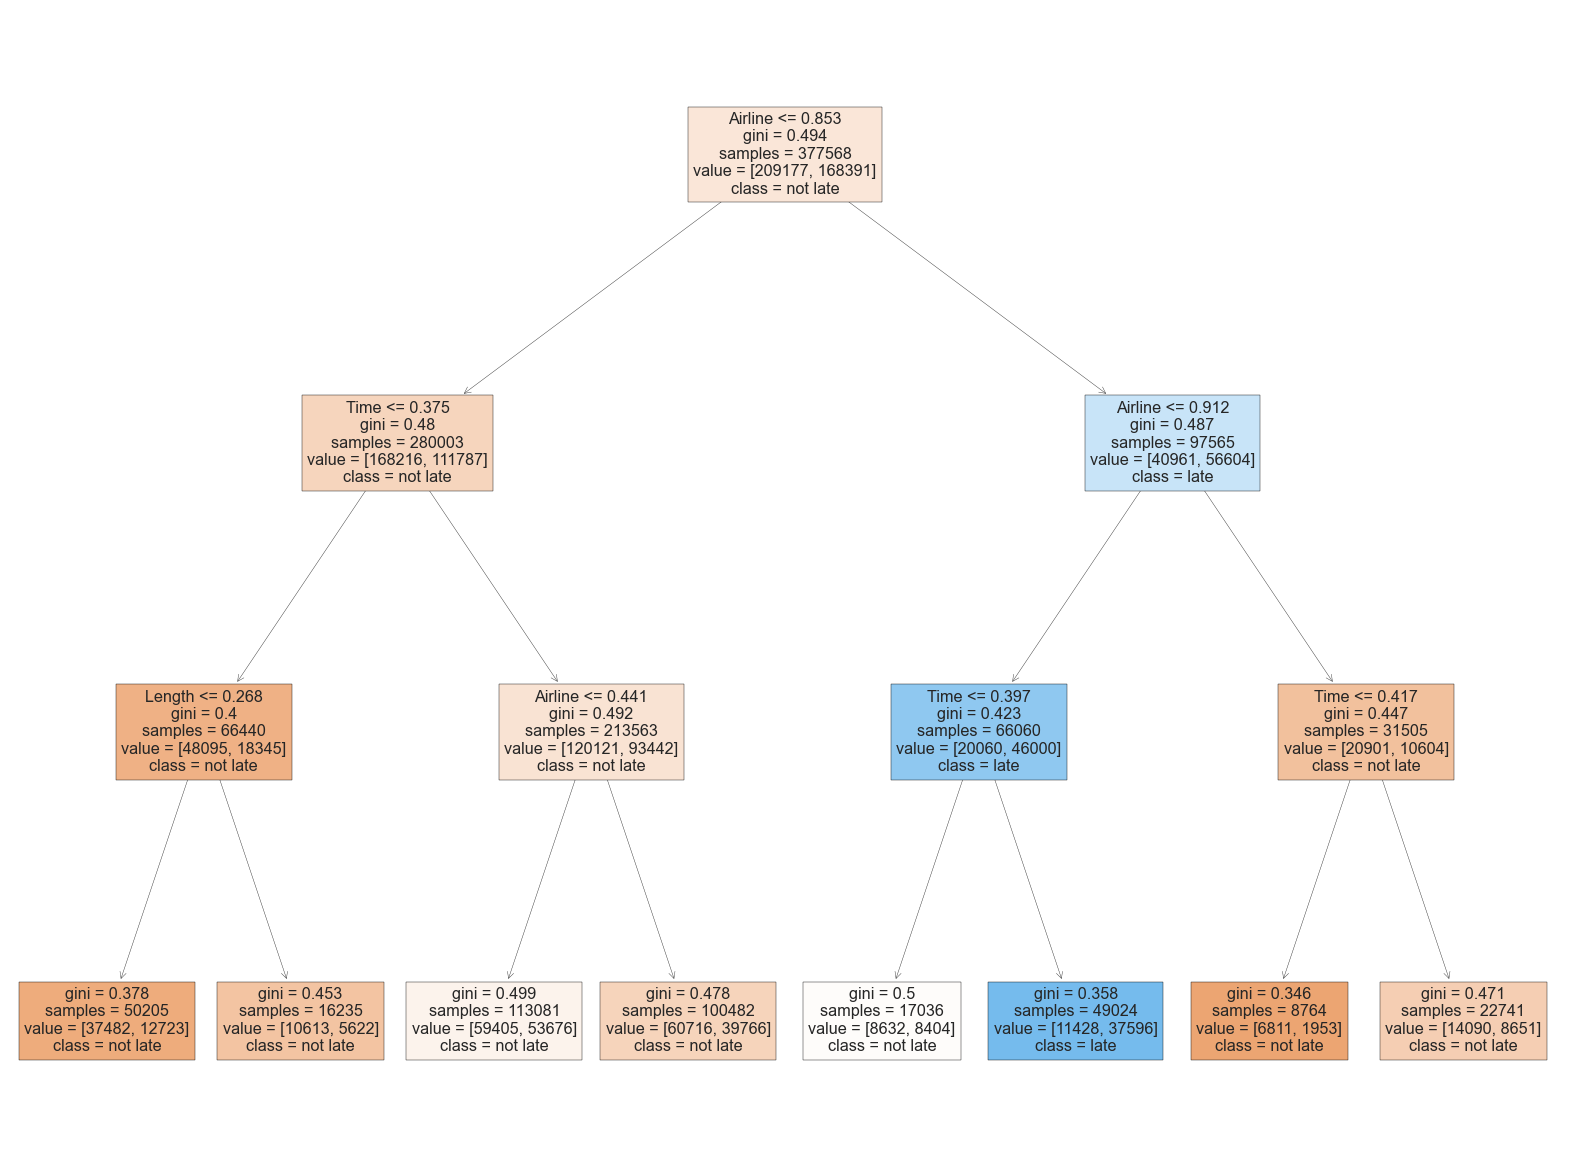

In [40]:

fig = plt.figure(figsize=(20,15))
tree.plot_tree(clf_1, feature_names = df.columns[:-1], class_names=['not late', 'late'], filled=True);

0.6262089423106634

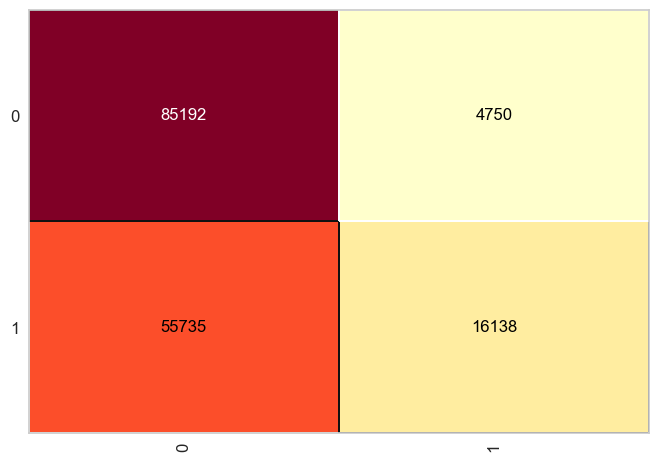

In [41]:
cm_1 = ConfusionMatrix(clf_1)
cm_1.fit(x_train, y_train)
cm_1.score(x_test, y_test)

In [42]:
classification_clf_1 = (classification_report(y_test, pred_1))

print(classification_clf_1)

              precision    recall  f1-score   support

           0       0.60      0.95      0.74     89942
           1       0.77      0.22      0.35     71873

    accuracy                           0.63    161815
   macro avg       0.69      0.59      0.54    161815
weighted avg       0.68      0.63      0.56    161815



In [43]:
columns_1 = df.iloc[:, 0:7].columns
feature_1 = pd.Series(clf_1.feature_importances_, index = columns).sort_values(ascending = False)
feature_1

Airline        0.683418
Time           0.303341
Length         0.013241
Flight         0.000000
AirportFrom    0.000000
AirportTo      0.000000
DayOfWeek      0.000000
dtype: float64

In [44]:
random_forest = RandomForestClassifier(n_estimators = 100, max_depth = 3, criterion = 'entropy', random_state = 0)
random_forest.fit(x_train, y_train)
RandomForestClassifier(max_depth = 3, criterion = 'entropy', random_state = 0)
predict = random_forest.predict(x_test)

0.6278033556839601

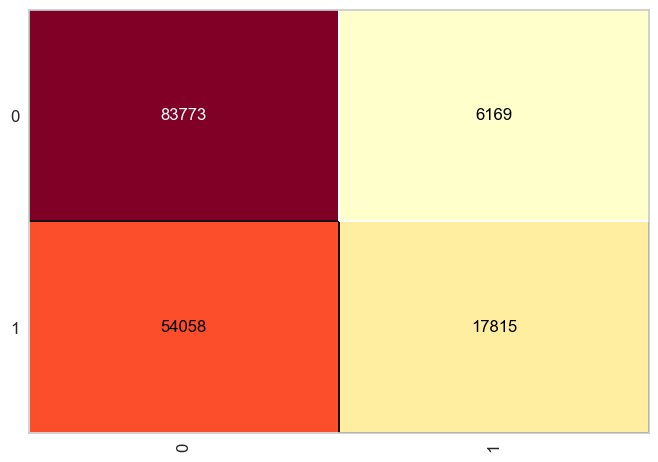

In [45]:
cm_2 = ConfusionMatrix(random_forest)
cm_2.fit(x_train, y_train)
cm_2.score(x_test, y_test)

In [46]:
classification_clf_2 = (classification_report(y_test, predict))

print(classification_clf_2)

columns_2 = df.iloc[:, 0:7].columns
feature_2 = pd.Series(random_forest.feature_importances_, index = columns).sort_values(ascending = False)
feature_2

              precision    recall  f1-score   support

           0       0.61      0.93      0.74     89942
           1       0.74      0.25      0.37     71873

    accuracy                           0.63    161815
   macro avg       0.68      0.59      0.55    161815
weighted avg       0.67      0.63      0.57    161815



Airline        0.412551
Time           0.357931
Flight         0.086245
AirportTo      0.070035
Length         0.050024
AirportFrom    0.013180
DayOfWeek      0.010034
dtype: float64

              precision    recall  f1-score   support

           0       0.61      0.93      0.73     89942
           1       0.73      0.25      0.38     71873

    accuracy                           0.63    161815
   macro avg       0.67      0.59      0.56    161815
weighted avg       0.66      0.63      0.58    161815



Airline        0.426550
Time           0.345926
Flight         0.086587
AirportTo      0.069137
Length         0.049145
AirportFrom    0.011465
DayOfWeek      0.011191
dtype: float64

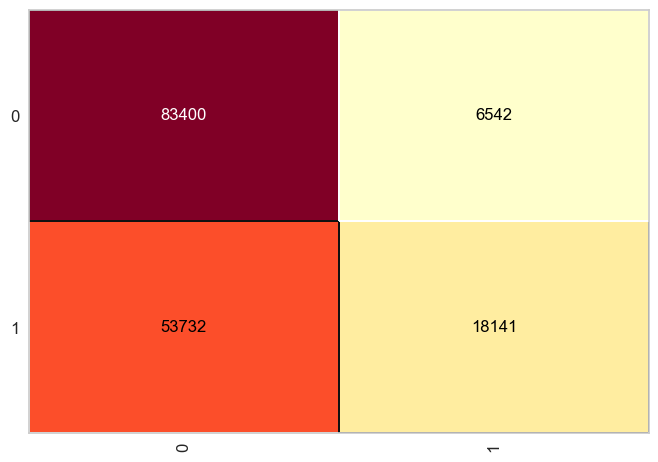

In [47]:
random_forest_1 = RandomForestClassifier(n_estimators = 100, max_depth = 3, random_state = 0)
random_forest_1.fit(x_train, y_train)

predict_1 = random_forest_1.predict(x_test)

cm_3 = ConfusionMatrix(random_forest_1)
cm_3.fit(x_train, y_train)
cm_3.score(x_test, y_test)

classification_clf_3 = (classification_report(y_test, predict_1))
print(classification_clf_3)

columns_3 = df.iloc[:, 0:7].columns
feature_3 = pd.Series(random_forest_1.feature_importances_, index = columns).sort_values(ascending = False)
feature_3

In [48]:
#KNN

In [49]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(metric = 'minkowski', p=2)

In [50]:
k_list = list(range(1,31))
k_values = dict(n_neighbors = k_list)

In [51]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(knn, k_values, cv = 5, scoring = 'accuracy')
grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             scoring='accuracy')

In [52]:
grid.best_params_

{'n_neighbors': 30}

In [53]:
grid.best_score_

0.6339017117478164

In [60]:
knn = KNeighborsClassifier(n_neighbors = 8, metric = 'minkowski', p=2)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [61]:
predict_4 = knn.predict(x_test)

              precision    recall  f1-score   support

           0       0.63      0.78      0.70     89942
           1       0.61      0.43      0.51     71873

    accuracy                           0.63    161815
   macro avg       0.62      0.61      0.60    161815
weighted avg       0.62      0.63      0.61    161815



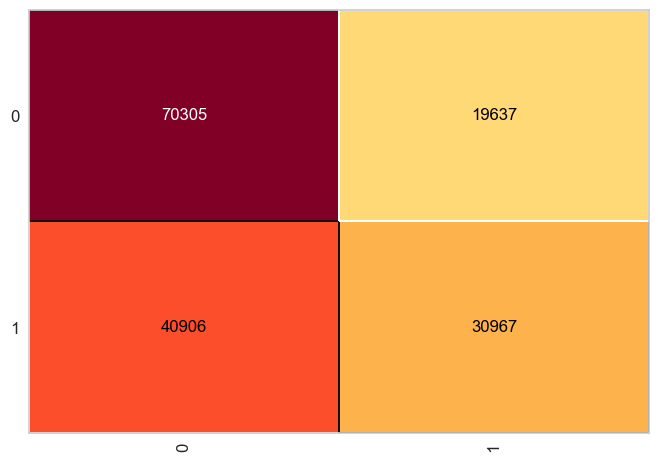

In [62]:
cm_4 = ConfusionMatrix(knn)
cm_4.fit(x_train, y_train)
cm_4.score(x_test, y_test)

classification_knn = (classification_report(y_test, predict_4))
print(classification_knn)